In [1]:
import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Girish\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### Q1. Who were the passengers on the titanic?

C:\Users\Girish\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


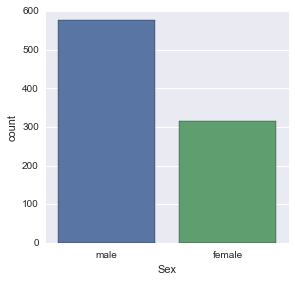

In [5]:
sns.factorplot('Sex',data = titanic_df, kind = 'count')

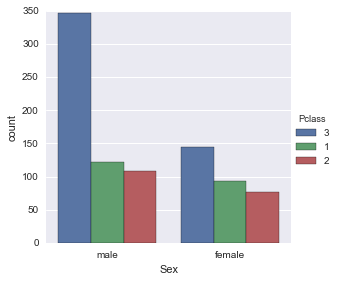

In [6]:
sns.factorplot('Sex',data = titanic_df, kind = 'count', hue = 'Pclass')

### Class wise compaison between male and female counts

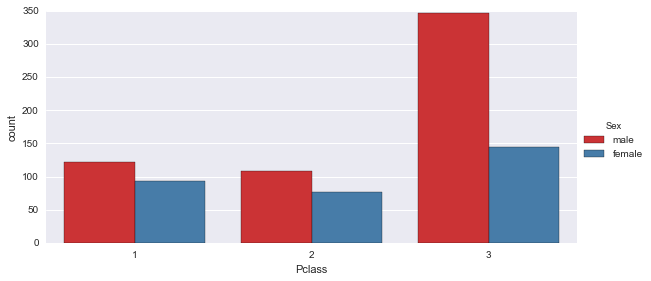

In [7]:
sns.factorplot('Pclass',data = titanic_df, kind = 'count', hue = 'Sex', order = [1,2,3], palette = 'Set1', size = 4, aspect = 2)

In [8]:
#function to identify passenger as a child if age is leass than 16
def male_female_child(passenger):
    sex,age = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [9]:
titanic_df['person'] = titanic_df[['Sex','Age']].apply(male_female_child, axis =1)

titanic_df[11:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female
12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,male
13,14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,male
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,child


#### counts of male, female and child categories

In [10]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

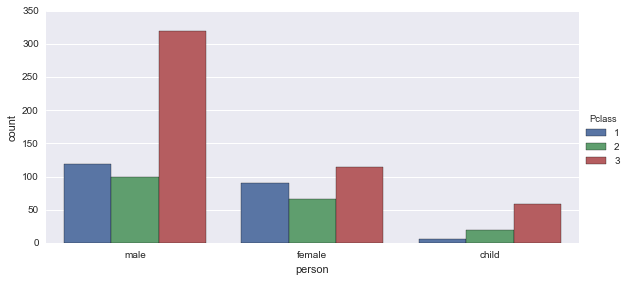

In [11]:
sns.factorplot('person', data= titanic_df, kind= 'count', hue= 'Pclass', hue_order = [1,2,3], size = 4, aspect =2)

### Class-wise Distribution among male, female and child categories

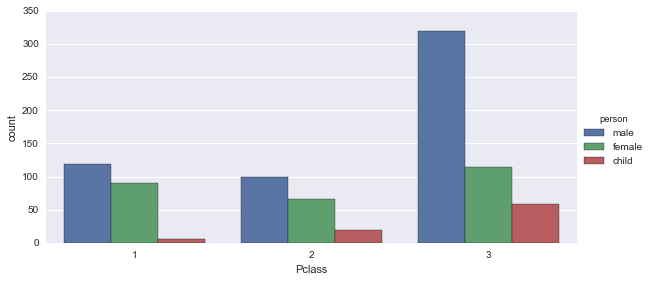

In [12]:
sns.factorplot('Pclass', data= titanic_df, kind= 'count', hue= 'person', order=[1,2,3], size = 4, aspect =2)

### Now working with Age data

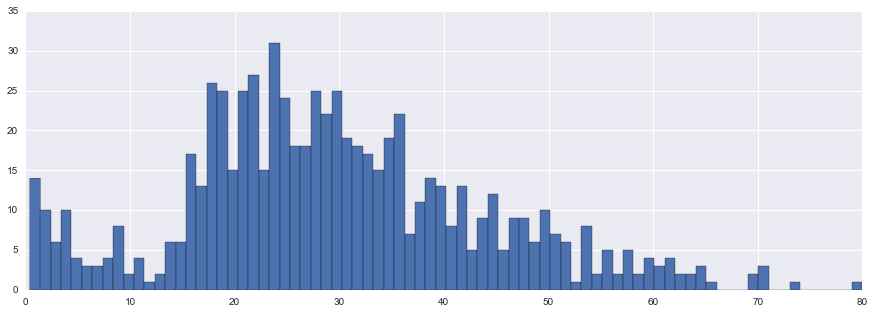

In [13]:
titanic_df['Age'].hist(bins=80, figsize =(15,5))

Plot shows that while there is a distribution among all age groups, there are a lot of people in age group-17-30 years.

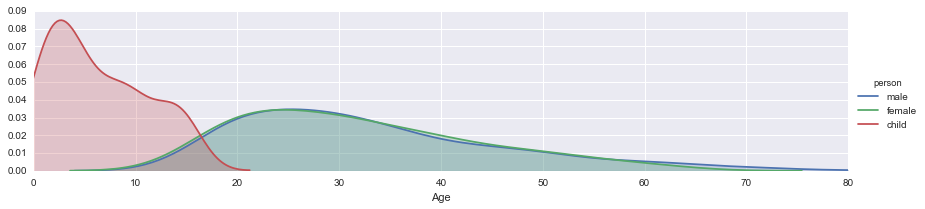

In [14]:
fig = sns.FacetGrid(titanic_df,hue = 'person', aspect=4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

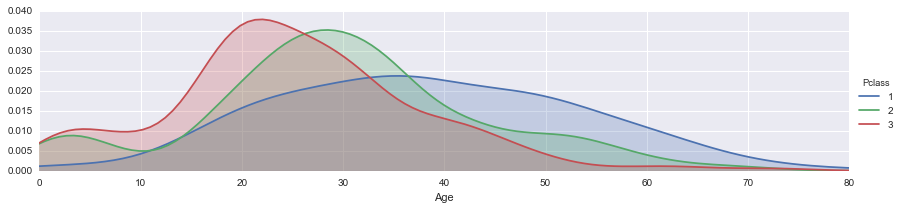

In [16]:
fig = sns.FacetGrid(titanic_df,hue = 'Pclass', hue_order = [1,2,3], aspect=4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

### Class-wise age distribution

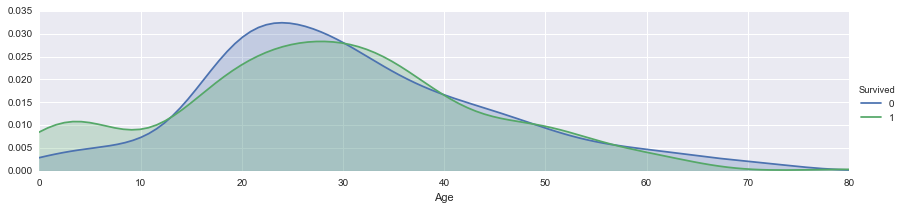

In [17]:
fig = sns.FacetGrid(titanic_df,hue = 'Survived', aspect=4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Plot shows that chances of survival were significantly higher for kids

### Q2. What deck were the passengers on and how does that relate to their class?

In [18]:
ser1 = pd.Series(titanic_df['Pclass'])
ser2 = pd.Series(titanic_df['Cabin'])

Deck_df = pd.concat((ser1,ser2), axis=1)
Deck_df.head()

,Pclass,Cabin
0,3,NaN
1,1,C85
2,3,NaN
3,1,C123
4,3,NaN


In [35]:
Deck_df.dropna(inplace=True)
Deck_df.head()

,Pclass,Cabin,Deck
1,1,C85,C
3,1,C123,C
6,1,E46,E
10,3,G6,G
11,1,C103,C


In [38]:
# As deck is represented by first letter of Column, we'll form a cabin_df with just the deck name in it
levels =[] #List initialized that can be used to form a single column DataFrame for decks
deck = Deck_df.Cabin
for level in deck:
    #print level[0]
    levels.append(level[0])
    
Deck_df['Deck'] = Series(levels, index = Deck_df.index)
Deck_df.head()
# Plotting for no. of people on different decks
# sns.factorplot('Deck', data = Deck_df, kind ='count',palette='winter_d', order = ['A','B','C','D','E','F','G','T'])

,Pclass,Cabin,Deck
1,1,C85,C
3,1,C123,C
6,1,E46,E
10,3,G6,G
11,1,C103,C


In [37]:
#Deck_df.drop('Deck', axis=1, inplace=True)

In [39]:
Deck_df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

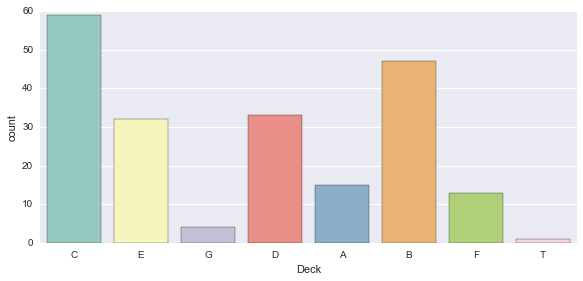

In [43]:
sns.factorplot('Deck', data = Deck_df, kind = 'count', palette = 'Set3', size=4, aspect =2)

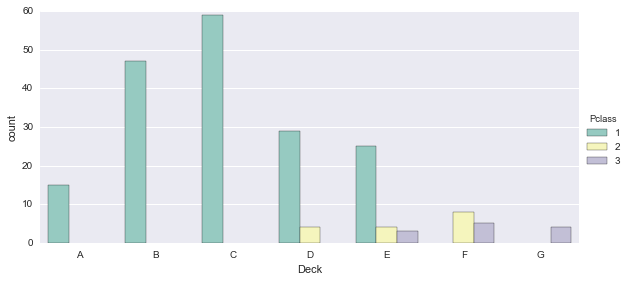

In [45]:
Deck_df = Deck_df[Deck_df['Deck'] != 'T']

sns.factorplot('Deck', data = Deck_df, kind = 'count', hue ='Pclass', order = ['A','B','C','D','E','F','G'], hue_order = [1,2,3], palette = 'Set3', size=4, aspect =2)

So, among the people for whom cabin data is available, most of them were on Deck B or C.
In fact, most of the people for whom 'Cabin' data is available, were from Class 1.

### Q3. Where did people come from?

In [46]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most no of people embarked from Southampton, almost 4 times the no. of people embarked from scond-placed Cherbourg. Only 77 people embarked from Queenstown.

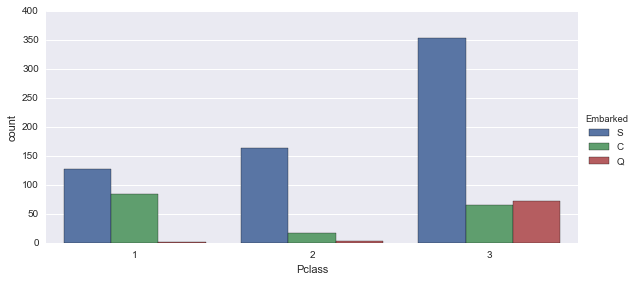

In [47]:
sns.factorplot('Pclass', data= titanic_df, kind= 'count', hue= 'Embarked', order = [1,2,3], hue_order=['S','C','Q'],size=4, aspect = 2)

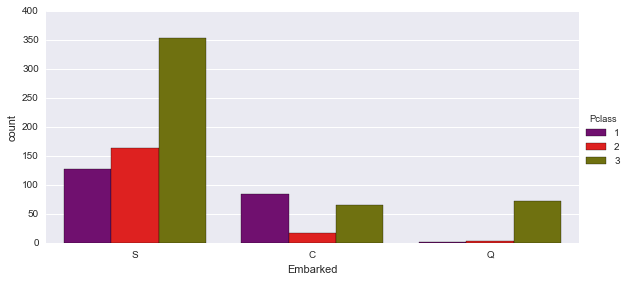

In [51]:
sns.factorplot('Embarked', data = titanic_df, kind= 'count',palette='brg', hue = 'Pclass', hue_order = [1,2,3], size =4, aspect = 2)

Almost all the people from Queenstown were in 3rd class, which can be an indicator of financial inferiority of the town compared to other 2. Also, from Southampton, a lot of people boarded into 3rd class but at the same eime, there was a significantly larger portion of people in 1st and 2nd class from Southampton.

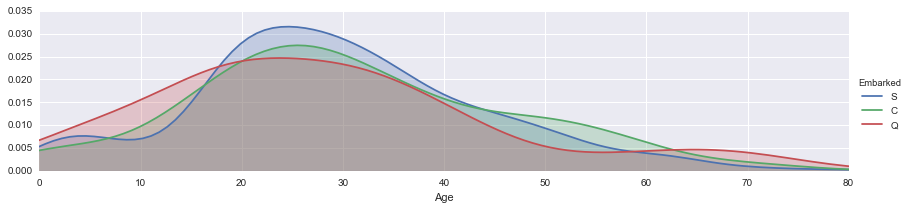

In [49]:
fig = sns.FacetGrid(titanic_df,hue = 'Embarked', aspect=4)

fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

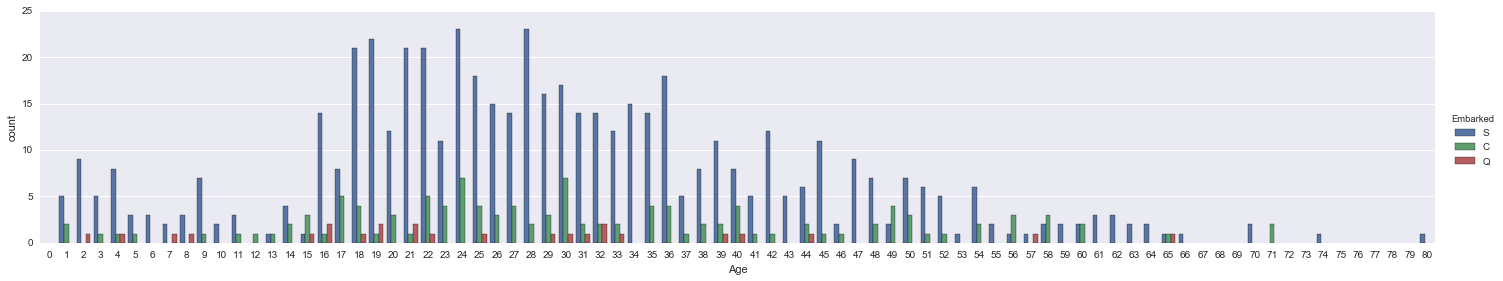

In [50]:
age_group= Series(np.arange(81))
sns.factorplot('Age', data= titanic_df, kind= 'count', hue= 'Embarked', order = age_group, hue_order=['S','C','Q'],size = 4 , aspect = 5)

At any age group, no of people boarding from Southampton were much higher.

### Q4. Who were with family and who was alone??

In [52]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df['Alone'][11:20]

11    0
12    0
13    6
14    0
15    0
16    5
17    0
18    1
19    0
Name: Alone, dtype: int64

In [53]:
titanic_df['Alone'][titanic_df['Alone']>0].value_counts()

1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone, dtype: int64

In [54]:
titanic_df['Alone'][titanic_df['Alone']>0].count()

354

In [55]:
def family_or_not(passenger):
    alone = passenger
    if alone>0:
        return 'Yes'
    else:
        return 'No'

In [56]:
titanic_df['Family'] = map(family_or_not,titanic_df['Alone'])

In [57]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0,No


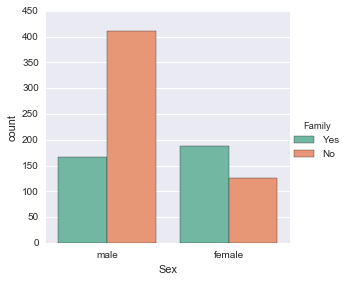

In [60]:
sns.factorplot('Sex', data = titanic_df, kind = 'count', palette = 'Set2', hue='Family')

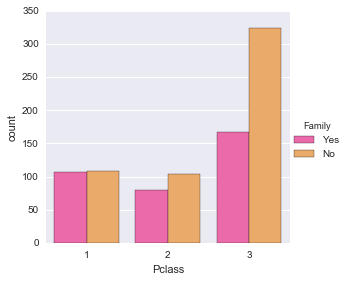

In [65]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', palette = 'spring', hue='Family', order=[1,2,3])

So, most of the people in class 1 and 2 were with families, where class 3 had a lot of 'Alone' folks.
Also, while major male population was alone, more than half of the females were with families.

### How were the chances of survival for people with families vs 'alone' people?

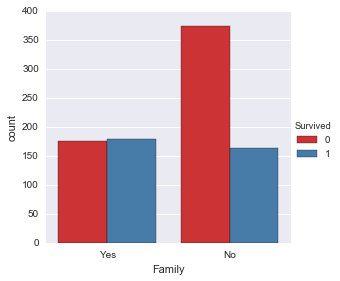

In [68]:
sns.factorplot('Family', data = titanic_df, kind = 'count', palette ='Set1', hue='Survived')

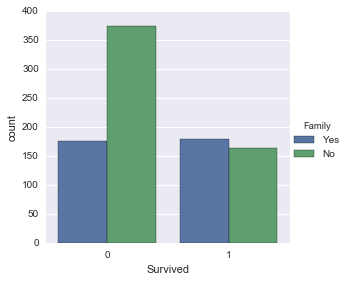

In [106]:
sns.factorplot('Survived', data = titanic_df, kind = 'count', hue='Family')

As clear from the plots, people with families had much higher chances of survival.

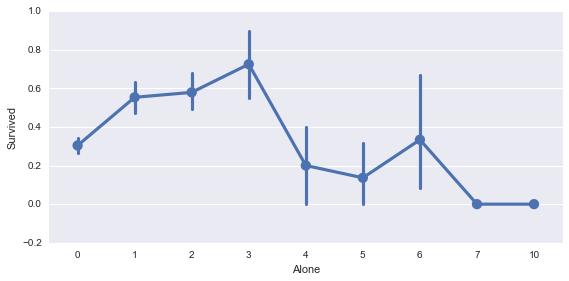

In [76]:
sns.factorplot('Alone','Survived',data=titanic_df, aspect =2, order = [0,1,2,3,4,5,6,7,10])

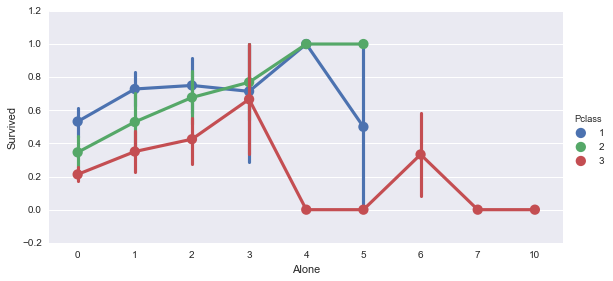

In [77]:
sns.factorplot('Alone','Survived',hue='Pclass',data=titanic_df, aspect =2, x_order = [0,1,2,3,4,5,6,7,10], hue_order = [1,2,3])

One interesting insight is that thogh people with families had higher chances of survival, people with very large families didn't get the benifit of having a family. Class wise also, families in higher classes had more chances of survival.

### Looking further into survival factors

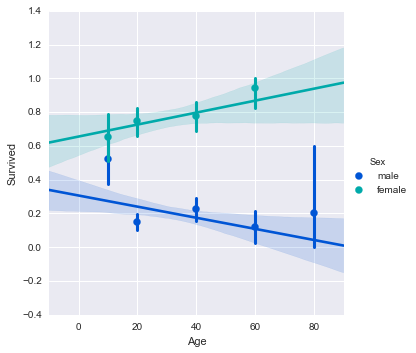

In [78]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

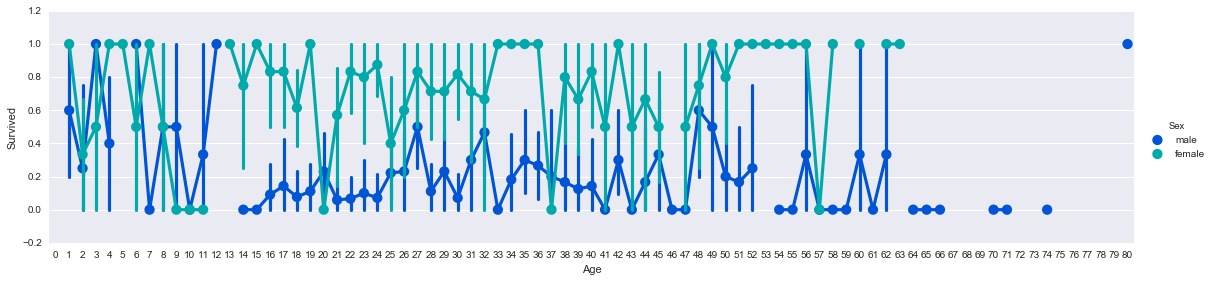

In [79]:
age_group= Series(np.arange(81))
sns.factorplot('Age','Survived',hue='Sex', order = age_group ,data=titanic_df,palette='winter',aspect=4)

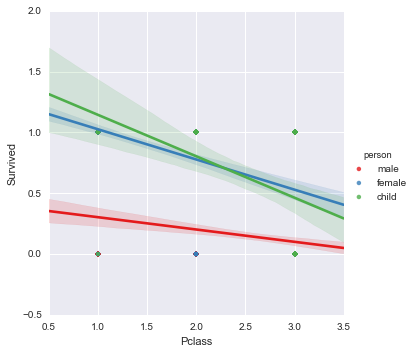

In [80]:
sns.lmplot('Pclass','Survived',hue='person',data=titanic_df,palette='Set1')

As in most emergency situations, ladies and kids get preference. Hence, it justifies them having a clear higher rate of survival.

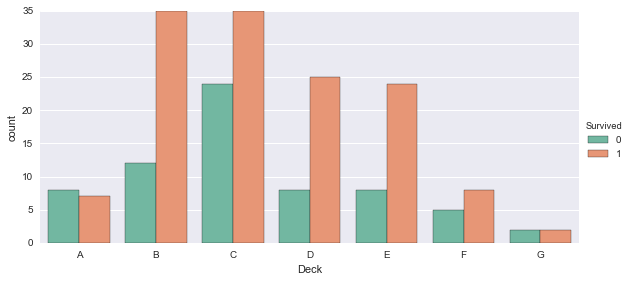

In [81]:
deck = Series(titanic_df['Cabin'])

levels = []

for level in deck:
    if str(level) == 'nan':
        levels.append('NA')
    else:
        levels.append(str(level)[0])

titanic_df['Deck']= levels

#titanic_df.head()

sns.factorplot('Deck',data = titanic_df,kind='count',hue='Survived',palette='Set2',order=['A','B','C','D','E','F','G'],aspect=2)

#sns.factorplot('Deck', data = titanic_df, kind ='count', hue = 'Survived',palette='Set2')

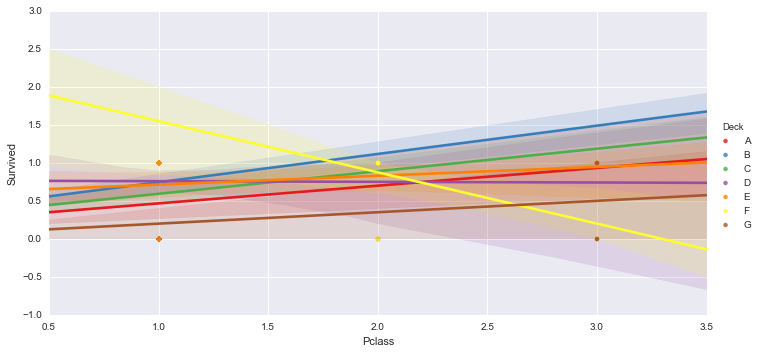

In [82]:
sns.lmplot('Pclass','Survived',hue='Deck', hue_order= ['A','B','C','D','E','F','G'], data=titanic_df,palette='Set1', aspect =2)

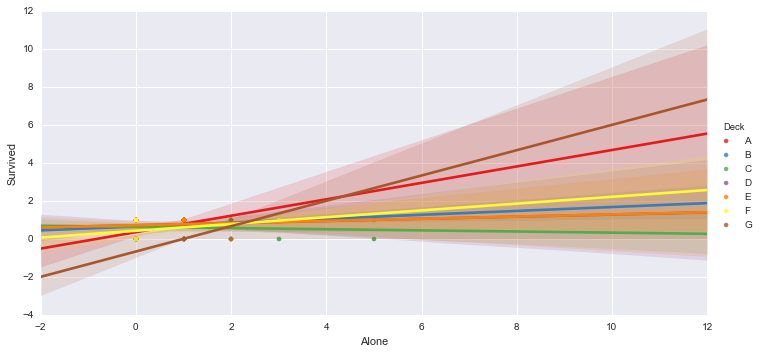

In [83]:
sns.lmplot('Alone','Survived',hue='Deck', hue_order= ['A','B','C','D','E','F','G'], data=titanic_df,palette='Set1', aspect =2)